In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [3]:
train_images.shape

(60000, 28, 28)

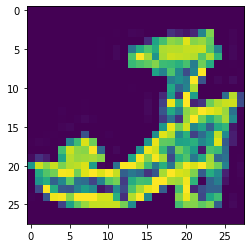

In [4]:
plt.imshow(train_images[60])

In [5]:
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

In [6]:
##hacer un reshape de la primera dimension del dataser
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [7]:
train_labels= tf.keras.utils.to_categorical(train_labels,10)
test_labels= tf.keras.utils.to_categorical(test_labels,10)

In [8]:
##Creando nuestro modelo de Datos
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [9]:
##entrenando nuestra primera red convolucional clase5/24
##Compilar y entrenar

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy']) 

In [10]:
model.fit(train_images,train_labels,batch_size=64,epochs=15)


Epoch 1/15
938/938 [==============================] - 96s 102ms/step - loss: 0.5755 - accuracy: 0.7893
Epoch 2/15
938/938 [==============================] - 81s 86ms/step - loss: 0.4005 - accuracy: 0.8583
Epoch 3/15
938/938 [==============================] - 88s 94ms/step - loss: 0.3541 - accuracy: 0.8725
Epoch 4/15
938/938 [==============================] - 96s 102ms/step - loss: 0.3331 - accuracy: 0.8811
Epoch 5/15
938/938 [==============================] - 76s 81ms/step - loss: 0.3263 - accuracy: 0.8851
Epoch 6/15
938/938 [==============================] - 74s 79ms/step - loss: 0.3155 - accuracy: 0.8887
Epoch 7/15
938/938 [==============================] - 73s 77ms/step - loss: 0.3162 - accuracy: 0.8895
Epoch 8/15
938/938 [==============================] - 76s 81ms/step - loss: 0.3164 - accuracy: 0.8898
Epoch 9/15
938/938 [==============================] - 79s 84ms/step - loss: 0.3157 - accuracy: 0.8899
Epoch 10/15
938/938 [==============================] - 76s 81ms/step - loss: 0.3

In [11]:
model.evaluate(test_images,test_labels,verbose=0)

[0.2820945978164673, 0.9046000242233276]